In [67]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import itertools
from collections import Counter
from networkx.drawing.nx_agraph import graphviz_layout
from skbio.stats.composition import ilr
from skbio.stats.composition import clr
from skbio.stats.composition import multiplicative_replacement
import seaborn as sns
from matplotlib import rcParams
sns.set()
sns.set(font_scale=1.3)

In [68]:
import json

loaded_json_pfam = {}

with open("./Files/Dictionary/pfamDictionary.json", 'r+') as f:
    loaded_json_pfam = json.loads(f.read())

loaded_json_pfam
PFAM_names = {x:str(x)+": "+str(y) for x,y in loaded_json_pfam.items()}

In [69]:
import json

loaded_json_tigr = {}

with open("./Files/Dictionary/tigrfamDictionary.json", 'r+') as f:
    loaded_json_tigr = json.loads(f.read())

TIGRFAM_names = {x:str(x)+": "+str(y) for x,y in loaded_json_tigr.items()}

In [70]:
####################################################################

In [71]:
TIGRFAM_role = pd.read_csv("./Files/Dataframes/Roles/ALL_TIGR_ROLES_DF.csv").set_index("TIGRFAM")
TIGRFAM_role.head()

,ROLE_ID,SubRole,MainRole,Role
TIGRFAM,,,,
TIGR00001,158,Ribosomal proteins: synthesis and modification,Protein synthesis,Protein synthesis::Ribosomal proteins: synthes...
TIGR00002,158,Ribosomal proteins: synthesis and modification,Protein synthesis,Protein synthesis::Ribosomal proteins: synthes...
TIGR00003,145,Cations and iron carrying compounds,Transport and binding proteins,Transport and binding proteins::Cations and ir...
TIGR00004,92,Other,Cellular processes,Cellular processes::Other
TIGR00005,168,tRNA and rRNA base modification,Protein synthesis,Protein synthesis::tRNA and rRNA base modifica...


In [72]:
TIGRFAM_SubroleDict = {x:TIGRFAM_role.at[x,'SubRole'] for x in TIGRFAM_role.index}
TIGRFAM_MainroleDict = {x:TIGRFAM_role.at[x,'MainRole'] for x in TIGRFAM_role.index}

## Load Cluster Functional DF

In [73]:
cluster_TIGRFAM_o = pd.read_csv("./Files/Dataframes/TIGRFAM_clusterFunctionality_PCA.csv").set_index("Unnamed: 0")
cluster_TIGRFAM = pd.read_csv("./Files/Dataframes/TIGRFAM_clusterFunctionality_PCA.csv").set_index("Unnamed: 0").rename(columns=TIGRFAM_names)
cluster_TIGRFAM.index.name='Cluster'

cluster_PFAM = pd.read_csv("./Files/Dataframes/PFAM_clusterFunctionality_PCA.csv").set_index("Unnamed: 0").rename(columns=PFAM_names)
cluster_PFAM.index.name='Cluster'

## Assign Functional Profiles to Clusters

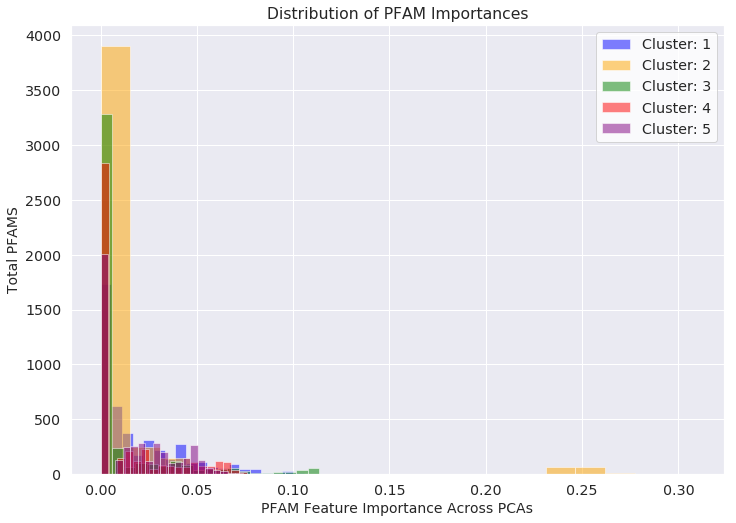

In [74]:
rcParams['figure.figsize'] = 11.7,8.27
sns.set(font_scale=1.3)
plt.hist(cluster_PFAM.loc['Cluster: 1'], bins=20, alpha=0.5, label="Cluster: 1", color='blue')
plt.hist(cluster_PFAM.loc['Cluster: 2'], bins=20, alpha=0.5, label="Cluster: 2", color='orange')
plt.hist(cluster_PFAM.loc['Cluster: 3'], bins=20, alpha=0.5, label="Cluster: 3", color='green')
plt.hist(cluster_PFAM.loc['Cluster: 4'], bins=20, alpha=0.5, label="Cluster: 4", color='red')
plt.hist(cluster_PFAM.loc['Cluster: 5'], bins=20, alpha=0.5, label="Cluster: 5", color='purple')

plt.xlabel("PFAM Feature Importance Across PCAs", size=14)
plt.ylabel("Total PFAMS", size=14)
plt.title("Distribution of PFAM Importances")
plt.legend(loc='upper right', facecolor='white')
#plt.savefig("pfam_importances.pdf", bbox_inches='tight', dpi=300)

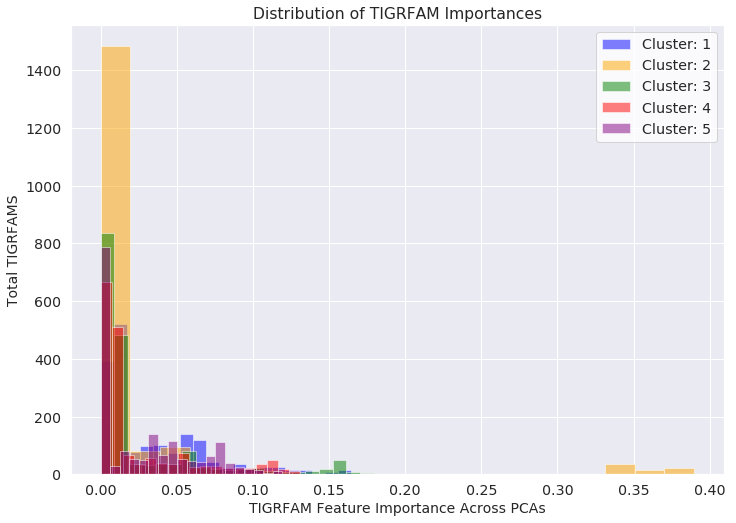

In [75]:
rcParams['figure.figsize'] = 11.7,8.27
sns.set(font_scale=1.3)
plt.hist(cluster_TIGRFAM.loc['Cluster: 1'], bins=20, alpha=0.5, label="Cluster: 1", color='blue')
plt.hist(cluster_TIGRFAM.loc['Cluster: 2'], bins=20, alpha=0.5, label="Cluster: 2", color='orange')
plt.hist(cluster_TIGRFAM.loc['Cluster: 3'], bins=20, alpha=0.5, label="Cluster: 3", color='green')
plt.hist(cluster_TIGRFAM.loc['Cluster: 4'], bins=20, alpha=0.5, label="Cluster: 4", color='red')
plt.hist(cluster_TIGRFAM.loc['Cluster: 5'], bins=20, alpha=0.5, label="Cluster: 5", color='purple')

plt.xlabel("TIGRFAM Feature Importance Across PCAs", size=14)
plt.ylabel("Total TIGRFAMS", size=14)
plt.title("Distribution of TIGRFAM Importances")
plt.legend(loc='upper right', facecolor='white')
#plt.savefig("tigrFamImportances.pdf", bbox_inches='tight', dpi=300)

## Cluster 1

In [76]:
tempDict = {'Pfam':[],'Description':[],'Total Importance':[],'Module Cluster':[]}

for i in cluster_PFAM.loc['Cluster: 2'].sort_values(ascending=False).head(10).index:
    tempDict['Pfam'].append(i.split(":")[0])
    tempDict['Description'].append(i.split(":")[1])
    tempDict['Total Importance'].append(cluster_PFAM.loc['Cluster: 2'].loc[i])
    tempDict['Module Cluster'].append('Cluster: 1')
    
tempDF = pd.DataFrame(data=tempDict)
tempDF

,Pfam,Description,Total Importance,Module Cluster
0,PF05658,Head domain of trimeric autotransporter adhesin,0.308103,Cluster: 1
1,PF05662,Coiled stalk of trimeric autotransporter adhesin,0.297110,Cluster: 1
2,PF03895,YadA-like membrane anchor domain,0.297110,Cluster: 1
3,PF03938,Outer membrane protein (OmpH-like),0.280835,Cluster: 1
4,PF03709,"Orn/Lys/Arg decarboxylase, N-terminal domain",0.280835,Cluster: 1
5,PF00395,S-layer homology domain,0.276507,Cluster: 1
6,PF13018,Extended Signal Peptide of Type V secretion s...,0.273047,Cluster: 1
7,PF02472,Biopolymer transport protein ExbD/TolR,0.273047,Cluster: 1
8,PF03544,Gram-negative bacterial TonB protein C-terminal,0.273047,Cluster: 1
9,PF03797,Autotransporter beta-domain,0.273047,Cluster: 1


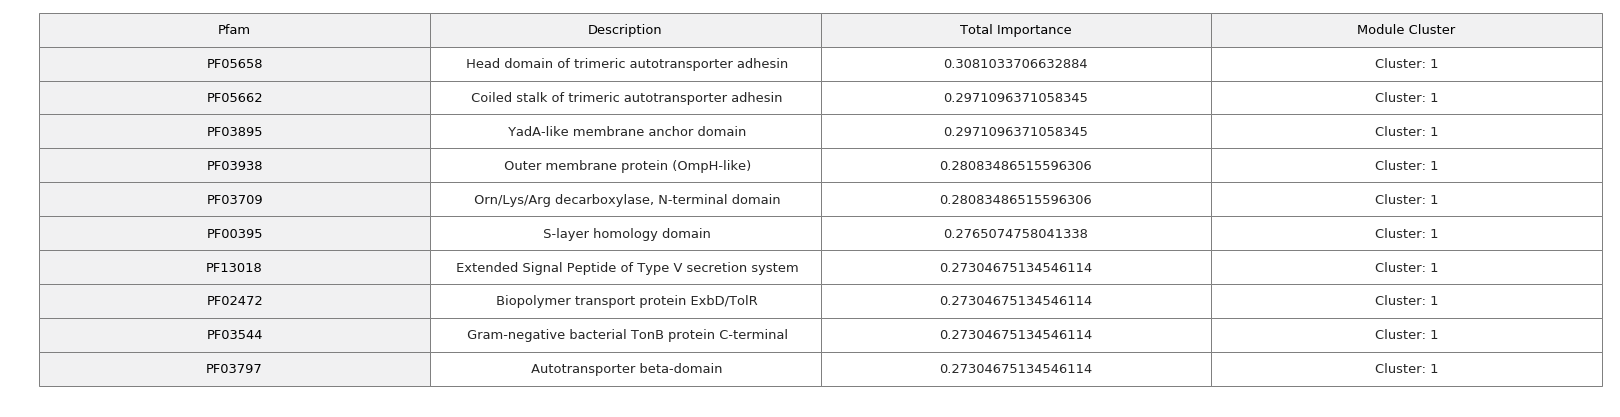

In [77]:
import six
def render_mpl_table(data, col_width=1.0, row_height=0.625, font_size=13,
                     header_color='#f1f1f2', row_colors=['w', 'w'], edge_color='grey',
                     bbox=[0, 0, 1, 1], header_columns=0, 
                     ax=None, **kwargs):
    
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    tab_2 = []
    for i in data.values:
        numm = 0
        tempList = []
        for j in i:
            if numm < 3:
                tempList.append(j)
            else:
                tempList.append(j)
            numm+=1
        tab_2.append(tempList)
        
    mpl_table = ax.table(cellText=tab_2, bbox=bbox, colLabels=data.columns, cellLoc='center', **kwargs)
    
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='normal', color='black', )
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
            
    return ax

fig = render_mpl_table(tempDF, header_columns=1, col_width=7.0)
plt.show()

In [78]:
countt = 0
cluster1_pfams = []
for entry in list(cluster_PFAM.loc['Cluster: 1'].sort_values(ascending=False).index):
    if countt < 10:
        if 'Unknown' in entry or 'unknown' in entry:
            continue
        else:
            cluster1_pfams.append(entry)
            countt +=1
    else:
        break
cluster1_pfams

['PF00563: EAL domain',
 'PF00990: Diguanylate cyclase, GGDEF domain',
 'PF04647: Accessory gene regulator B',
 'PF04026: SpoVG',
 'PF06686: Stage III sporulation protein AC/AD protein family',
 'PF03862: SpoVAC/SpoVAEB sporulation membrane protein',
 'PF07873: YabP family',
 'PF08769: Sporulation initiation factor Spo0A C terminal',
 'PF07486: Cell Wall Hydrolase',
 'PF00269: Small, acid-soluble spore proteins, alpha/beta type']

In [79]:
countt = 0
cluster1_TIGRfams = []

for entry in list(cluster_TIGRFAM.loc['Cluster: 1'].sort_values(ascending=False).index):
    if countt < 10:
        if 'Unknown' in entry or 'unknown' in entry:
            continue
        else:
            cluster1_TIGRfams.append(entry)
            countt +=1
    else:
        break
cluster1_TIGRfams

['TIGR04223: quorum_AgrD: cyclic lactone autoinducer peptide',
 'TIGR00254: GGDEF: diguanylate cyclase (GGDEF) domain',
 'TIGR01343: hacA_fam: homoaconitate hydratase family protein',
 'TIGR02087: LEUD_arch: 3-isopropylmalate dehydratase, small subunit',
 'TIGR01925: spIIAB: anti-sigma F factor',
 'TIGR02086: IPMI_arch: 3-isopropylmalate dehydratase, large subunit',
 'TIGR02892: spore_yabP: sporulation protein YabP',
 'TIGR02836: spore_IV_A: stage IV sporulation protein A',
 'TIGR02875: spore_0_A: sporulation transcription factor Spo0A',
 'TIGR02888: spore_YlmC_YmxH: sporulation protein, YlmC/YmxH family']

In [80]:
from collections import Counter
cluster1_subRoles = {'MainRole':[],'Importance':[]}
countt=0

for tigr in cluster_TIGRFAM_o.loc['Cluster: 1'].sort_values(ascending=False).index:
    if countt < 100:
        if cluster_TIGRFAM_o.loc['Cluster: 1'][tigr] == 0.0:
            continue

        else:

            try:

                sub = TIGRFAM_MainroleDict[tigr]

                if 'unknown' in sub or 'General' in sub or 'Conserved' in sub or 'none' in sub or 'Unknown' in sub or 'None' in sub or 'Other' in sub or 'other' in sub:
                    continue

                else:
                    if len(sub[0]) > 1:
                        for x in sub:
                            cluster1_subRoles['MainRole'].append(x)
                            cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 1'][tigr]/len(sub))
                    else:
                        cluster1_subRoles['MainRole'].append(sub)
                        cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 1'][tigr])
                countt+=1

            except:
                continue
    else:
        continue


testDF = pd.DataFrame(data=cluster1_subRoles)
roleList = list(set(testDF['MainRole']))
testDF2 = pd.DataFrame(index=roleList, columns=['Importance'])
testDF2['Importance'] = 0.0

for row in testDF.index:
    testDF2.at[testDF.at[row,'MainRole'],'Importance'] += float(testDF.at[row,'Importance'])

testDF2.drop([np.nan], inplace=True)
testDF3 = testDF2.div(testDF2.sum(axis=0), axis=1).sort_values(by='Importance',ascending=False)
Cluster1_MainRole = testDF3.reset_index().rename(columns={'index':'MainRole','Importance':'Count'}).copy()
Cluster1_MainRole.head()

,MainRole,Count
0,Cellular processes,0.409696
1,Amino acid biosynthesis,0.131177
2,Energy metabolism,0.093256
3,Transport and binding proteins,0.086287
4,"Biosynthesis of cofactors, prosthetic groups, ...",0.076823


In [81]:
from collections import Counter
cluster1_subRoles = {'SubRole':[],'Importance':[]}

countt=0

for tigr in cluster_TIGRFAM_o.loc['Cluster: 1'].sort_values(ascending=False).index:
    if countt < 100:

        if cluster_TIGRFAM_o.loc['Cluster: 1'][tigr] == 0.0:
            continue

        else:

            try:

                sub = TIGRFAM_SubroleDict[tigr]

                if 'unknown' in sub or 'General' in sub or 'Conserved' in sub or 'none' in sub or 'Unknown' in sub or 'None' in sub or 'Other' in sub or 'other' in sub:
                    continue

                else:
                    if len(sub[0]) > 1:
                        for x in sub:
                            cluster1_subRoles['SubRole'].append(x)
                            cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 1'][tigr]/len(sub))
                    else:
                        cluster1_subRoles['SubRole'].append(sub)
                        cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 1'][tigr])
                countt+=1

            except:
                continue
    else:
        continue


testDF = pd.DataFrame(data=cluster1_subRoles)
roleList = list(set(testDF['SubRole']))
testDF2 = pd.DataFrame(index=roleList, columns=['Importance'])
testDF2['Importance'] = 0.0

for row in testDF.index:
    testDF2.at[testDF.at[row,'SubRole'],'Importance'] += float(testDF.at[row,'Importance'])

testDF2.drop([np.nan], inplace=True)
testDF3 = testDF2.div(testDF2.sum(axis=0), axis=1).sort_values(by='Importance',ascending=False)
Cluster1_subrole = testDF3.reset_index().rename(columns={'index':'SubRole','Importance':'Count'}).copy()
Cluster1_subrole.head()

,SubRole,Count
0,Sporulation and germination,0.205582
1,Chemotaxis and motility,0.172592
2,Histidine family,0.064514
3,"Heme, porphyrin, and cobalamin",0.059569
4,Anions,0.042445


## Cluster 2

In [82]:
countt = 0
cluster2_pfams = []

for entry in list(cluster_PFAM.loc['Cluster: 2'].sort_values(ascending=False).index):
    if countt < 10:
        if 'Unknown' in entry or 'unknown' in entry:
            continue
        else:
            cluster2_pfams.append(entry)
            countt +=1
    else:
        break
cluster2_pfams

['PF05658: Head domain of trimeric autotransporter adhesin',
 'PF05662: Coiled stalk of trimeric autotransporter adhesin',
 'PF03895: YadA-like membrane anchor domain',
 'PF03938: Outer membrane protein (OmpH-like)',
 'PF03709: Orn/Lys/Arg decarboxylase, N-terminal domain',
 'PF00395: S-layer homology domain',
 'PF13018: Extended Signal Peptide of Type V secretion system',
 'PF02472: Biopolymer transport protein ExbD/TolR',
 'PF03544: Gram-negative bacterial TonB protein C-terminal',
 'PF03797: Autotransporter beta-domain']

In [83]:
countt = 0
cluster2_TIGRfams = []
for entry in list(cluster_TIGRFAM.loc['Cluster: 2'].sort_values(ascending=False).index):
    if countt < 10:
        if 'Unknown' in entry or 'unknown' in entry:
            continue
        else:
            cluster2_TIGRfams.append(entry)
            countt +=1
    else:
        break
cluster2_TIGRfams

['TIGR04299: antiport_PotE: putrescine-ornithine antiporter',
 'TIGR01414: autotrans_barl: outer membrane autotransporter barrel domain',
 'TIGR01352: tonB_Cterm: TonB family C-terminal domain',
 'TIGR01730: RND_mfp: efflux transporter, RND family, MFP subunit',
 'TIGR02903: spore_lon_C: ATP-dependent protease, Lon family',
 'TIGR00215: lpxB: lipid-A-disaccharide synthase',
 'TIGR03717: R_switched_YjbE: integral membrane protein, YjbE family',
 'TIGR01694: MTAP: methylthioadenosine phosphorylase',
 'TIGR01853: lipid_A_lpxD: UDP-3-O-[3-hydroxymyristoyl] glucosamine N-acyltransferase LpxD',
 'TIGR00164: PS_decarb_rel: phosphatidylserine decarboxylase homolog']

In [84]:
from collections import Counter
cluster1_subRoles = {'MainRole':[],'Importance':[]}
countt=0


for tigr in cluster_TIGRFAM_o.loc['Cluster: 2'].sort_values(ascending=False).index:

    if countt < 100:

        if cluster_TIGRFAM_o.loc['Cluster: 2'][tigr] == 0.0:
            continue

        else:

            try:

                sub = TIGRFAM_MainroleDict[tigr]

                if 'unknown' in sub or 'General' in sub or 'Conserved' in sub or 'none' in sub or 'Unknown' in sub or 'None' in sub or 'Other' in sub or 'other' in sub:
                    continue

                else:
                    if len(sub[0]) > 1:
                        for x in sub:
                            cluster1_subRoles['MainRole'].append(x)
                            cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 2'][tigr]/len(sub))
                    else:
                        cluster1_subRoles['MainRole'].append(sub)
                        cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 2'][tigr])
                count +=1

            except:
                continue
    else:
        continue


testDF = pd.DataFrame(data=cluster1_subRoles)
roleList = list(set(testDF['MainRole']))
testDF2 = pd.DataFrame(index=roleList, columns=['Importance'])
testDF2['Importance'] = 0.0

for row in testDF.index:
    testDF2.at[testDF.at[row,'MainRole'],'Importance'] += float(testDF.at[row,'Importance'])

testDF2.dropna(inplace=True)
testDF3 = testDF2.div(testDF2.sum(axis=0), axis=1).sort_values(by='Importance',ascending=False)
Cluster2_MainRole = testDF3.reset_index().rename(columns={'index':'MainRole','Importance':'Count'}).copy()
Cluster2_MainRole.head()

,MainRole,Count
0,Cell envelope,0.197722
1,Transport and binding proteins,0.127778
2,DNA metabolism,0.081584
3,Energy metabolism,0.080895
4,Central intermediary metabolism,0.079366


In [85]:
from collections import Counter
cluster1_subRoles = {'SubRole':[],'Importance':[]}
countt=0

for tigr in cluster_TIGRFAM_o.loc['Cluster: 2'].sort_values(ascending=False).index:
    if countt < 100:

        if cluster_TIGRFAM_o.loc['Cluster: 2'][tigr] == 0.0:
            continue

        else:

            try:

                sub = TIGRFAM_SubroleDict[tigr]

                if 'unknown' in sub or 'General' in sub or 'Conserved' in sub or 'none' in sub or 'Unknown' in sub or 'None' in sub or 'Other' in sub or 'other' in sub:
                    continue

                else:
                    if len(sub[0]) > 1:
                        for x in sub:
                            cluster1_subRoles['SubRole'].append(x)
                            cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 2'][tigr]/len(sub))
                    else:
                        cluster1_subRoles['SubRole'].append(sub)
                        cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 2'][tigr])
                countt+=1

            except:
                continue
    else:
        continue


testDF = pd.DataFrame(data=cluster1_subRoles)
roleList = list(set(testDF['SubRole']))
testDF2 = pd.DataFrame(index=roleList, columns=['Importance'])
testDF2['Importance'] = 0.0

for row in testDF.index:
    testDF2.at[testDF.at[row,'SubRole'],'Importance'] += float(testDF.at[row,'Importance'])

testDF2.dropna(inplace=True) 
testDF3 = testDF2.div(testDF2.sum(axis=0), axis=1).sort_values(by='Importance',ascending=False)
Cluster2_subrole = testDF3.reset_index().rename(columns={'index':'SubRole','Importance':'Count'}).copy()
Cluster2_subrole.head()

,SubRole,Count
0,Biosynthesis and degradation of surface polysa...,0.211304
1,"DNA replication, recombination, and repair",0.099856
2,Phosphorus compounds,0.051990
3,Glutamate family,0.041179
4,tRNA and rRNA base modification,0.034735


## Cluster 3

In [86]:
countt = 0
cluster3_pfams = []

for entry in list(cluster_PFAM.loc['Cluster: 3'].sort_values(ascending=False).index):
    if countt < 10:
        if 'Unknown' in entry or 'unknown' in entry:
            continue
        else:
            cluster3_pfams.append(entry)
            countt +=1
    else:
        break
cluster3_pfams

['PF17966: Mub B2-like domain',
 'PF04270: Streptococcal histidine triad protein',
 'PF17965: Mucin binding domain',
 'PF04650: YSIRK type signal peptide',
 'PF17998: Cell surface antigen I/II C2 terminal domain',
 'PF17961: Bacterial Ig domain',
 'PF05975: Bacterial ABC transporter protein EcsB',
 'PF03083: Sugar efflux transporter for intercellular exchange',
 'PF08363: Glucan-binding protein C',
 'PF13473: Cupredoxin-like domain']

In [87]:
countt = 0
cluster3_TIGRfams = []
for entry in list(cluster_TIGRFAM.loc['Cluster: 3'].sort_values(ascending=False).index):
    if countt < 10:
        if 'Unknown' in entry or 'unknown' in entry:
            continue
        else:
            cluster3_TIGRfams.append(entry)
            countt +=1
    else:
        break
cluster3_TIGRfams

['TIGR04225: CshA_fibril_rpt: CshA-type fibril repeat',
 'TIGR04228: isopep_sspB_C2: adhesin isopeptide-forming adherence domain',
 'TIGR01168: YSIRK_signal: gram-positive signal peptide, YSIRK family',
 'TIGR01716: RGG_Cterm: transcriptional activator, Rgg/GadR/MutR family, C-terminal domain',
 'TIGR04308: repeat_SSSPR51: surface protein repeat SSSPR-51',
 'TIGR01363: strep_his_triad: streptococcal histidine triad protein',
 'TIGR03715: KxYKxGKxW: KxYKxGKxW signal peptide',
 'TIGR01654: bact_immun_7tm: bacteriocin-associated integral membrane protein',
 'TIGR02698: CopY_TcrY: copper transport repressor, CopY/TcrY family',
 'TIGR02194: GlrX_NrdH: glutaredoxin-like protein NrdH']

In [88]:
from collections import Counter
cluster1_subRoles = {'MainRole':[],'Importance':[]}
countt=0

for tigr in cluster_TIGRFAM_o.loc['Cluster: 3'].sort_values(ascending=False).index:

    if countt < 100:

        if cluster_TIGRFAM_o.loc['Cluster: 3'][tigr] == 0.0:
            continue

        else:

            try:

                sub = TIGRFAM_MainroleDict[tigr]

                if 'unknown' in sub or 'General' in sub or 'Conserved' in sub or 'none' in sub or 'Unknown' in sub or 'None' in sub or 'Other' in sub or 'other' in sub:
                    continue

                else:
                    if len(sub[0]) > 1:
                        for x in sub:
                            cluster1_subRoles['MainRole'].append(x)
                            cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 3'][tigr]/len(sub))
                    else:
                        cluster1_subRoles['MainRole'].append(sub)
                        cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 3'][tigr])
                countt+=1

            except:
                continue
    else:
        continue


testDF = pd.DataFrame(data=cluster1_subRoles)
roleList = list(set(testDF['MainRole']))
testDF2 = pd.DataFrame(index=roleList, columns=['Importance'])
testDF2['Importance'] = 0.0

for row in testDF.index:
    testDF2.at[testDF.at[row,'MainRole'],'Importance'] += float(testDF.at[row,'Importance'])

testDF2.dropna(inplace=True)
testDF3 = testDF2.div(testDF2.sum(axis=0), axis=1).sort_values(by='Importance',ascending=False)
Cluster3_MainRole = testDF3.reset_index().rename(columns={'index':'MainRole','Importance':'Count'}).copy()
Cluster3_MainRole.head()

,MainRole,Count
0,Energy metabolism,0.158550
1,Protein fate,0.125315
2,Cellular processes,0.106015
3,Transport and binding proteins,0.105404
4,DNA metabolism,0.079559


In [89]:
from collections import Counter
cluster1_subRoles = {'SubRole':[],'Importance':[]}
countt=0

for tigr in cluster_TIGRFAM_o.loc['Cluster: 3'].sort_values(ascending=False).index:
    if countt < 100:

        if cluster_TIGRFAM_o.loc['Cluster: 3'][tigr] == 0.0:
            continue

        else:

            try:

                sub = TIGRFAM_SubroleDict[tigr]

                if 'unknown' in sub or 'General' in sub or 'Conserved' in sub or 'none' in sub or 'Unknown' in sub or 'None' in sub or 'Other' in sub or 'other' in sub:
                    continue

                else:
                    if len(sub[0]) > 1:
                        for x in sub:
                            cluster1_subRoles['SubRole'].append(x)
                            cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 3'][tigr]/len(sub))
                    else:
                        cluster1_subRoles['SubRole'].append(sub)
                        cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 3'][tigr])
                countt+=1

            except:
                continue
    else:
        continue


testDF = pd.DataFrame(data=cluster1_subRoles)
roleList = list(set(testDF['SubRole']))
testDF2 = pd.DataFrame(index=roleList, columns=['Importance'])
testDF2['Importance'] = 0.0

for row in testDF.index:
    testDF2.at[testDF.at[row,'SubRole'],'Importance'] += float(testDF.at[row,'Importance'])

testDF2.dropna(inplace=True)
testDF3 = testDF2.div(testDF2.sum(axis=0), axis=1).sort_values(by='Importance',ascending=False)
Cluster3_subrole = testDF3.reset_index().rename(columns={'index':'SubRole','Importance':'Count'}).copy()
Cluster3_subrole.head()

,SubRole,Count
0,"DNA replication, recombination, and repair",0.083736
1,Protein and peptide secretion and trafficking,0.069569
2,"Carbohydrates, organic alcohols, and acids",0.061390
3,Biosynthesis and degradation of polysaccharides,0.059553
4,DNA interactions,0.046327


## Cluster 4

In [90]:
countt = 0
cluster4_pfams = []
for entry in list(cluster_PFAM.loc['Cluster: 4'].sort_values(ascending=False).index):
    if countt < 10:
        if 'Unknown' in entry or 'unknown' in entry:
            continue
        else:
            cluster4_pfams.append(entry)
            countt +=1
    else:
        break
cluster4_pfams

['PF11551: Outer membrane protein Omp28',
 'PF09093: Lyase, catalytic',
 'PF09092: Lyase, N terminal',
 'PF14112: Immunity protein 22',
 'PF12812: PDZ-like domain',
 'PF18291: HU domain fused to wHTH, Ig, or Glycine-rich motif',
 'PF14423: Immunity protein Imm5',
 'PF06537: Di-haem oxidoreductase, putative peroxidase',
 'PF13648: Lipocalin-like domain',
 'PF03173: Putative carbohydrate binding domain']

In [91]:
countt = 0
cluster4_TIGRfams = []
for entry in list(cluster_TIGRFAM.loc['Cluster: 4'].sort_values(ascending=False).index):
    if countt < 10:
        if 'Unknown' in entry or 'unknown' in entry:
            continue
        else:
            cluster4_TIGRfams.append(entry)
            countt +=1
    else:
        break
cluster4_TIGRfams

['TIGR04183: Por_Secre_tail: Por secretion system C-terminal sorting domain',
 'TIGR04056: OMP_RagA_SusC: TonB-linked outer membrane protein, SusC/RagA family',
 'TIGR03736: PRTRC_ThiF: PRTRC system ThiF family protein',
 'TIGR03738: PRTRC_C: PRTRC system protein C',
 'TIGR03741: PRTRC_E: PRTRC system protein E',
 "TIGR01331: bisphos_cysQ: 3'(2'),5'-bisphosphate nucleotidase",
 'TIGR01201: HU_rel: putative DNA-binding protein',
 'TIGR03548: mutarot_permut: cyclically-permuted mutarotase family protein',
 'TIGR00183: prok_nadp_idh: isocitrate dehydrogenase, NADP-dependent',
 'TIGR04057: SusC_RagA_signa: TonB-dependent outer membrane receptor, SusC/RagA subfamily, signature region']

In [92]:
from collections import Counter
cluster1_subRoles = {'MainRole':[],'Importance':[]}

countt=0

for tigr in cluster_TIGRFAM_o.loc['Cluster: 4'].sort_values(ascending=False).index:
    if countt < 100:

        if cluster_TIGRFAM_o.loc['Cluster: 4'][tigr] == 0.0:
            continue

        else:

            try:

                sub = TIGRFAM_MainroleDict[tigr]

                if 'unknown' in sub or 'General' in sub or 'Conserved' in sub or 'none' in sub or 'Unknown' in sub or 'None' in sub or 'Other' in sub or 'other' in sub:
                    continue

                else:
                    if len(sub[0]) > 1:
                        for x in sub:
                            cluster1_subRoles['MainRole'].append(x)
                            cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 4'][tigr]/len(sub))
                    else:
                        cluster1_subRoles['MainRole'].append(sub)
                        cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 4'][tigr])
                countt+=1
            except:
                continue
    else:
        continue


testDF = pd.DataFrame(data=cluster1_subRoles)
roleList = list(set(testDF['MainRole']))
testDF2 = pd.DataFrame(index=roleList, columns=['Importance'])
testDF2['Importance'] = 0.0

for row in testDF.index:
    testDF2.at[testDF.at[row,'MainRole'],'Importance'] += float(testDF.at[row,'Importance'])
    
testDF2.dropna(inplace=True)
testDF3 = testDF2.div(testDF2.sum(axis=0), axis=1).sort_values(by='Importance',ascending=False)
Cluster4_MainRole = testDF3.reset_index().rename(columns={'index':'MainRole','Importance':'Count'}).copy()
Cluster4_MainRole.head()

,MainRole,Count
0,Transport and binding proteins,0.193562
1,Energy metabolism,0.166913
2,"Biosynthesis of cofactors, prosthetic groups, ...",0.129178
3,Cell envelope,0.128461
4,Cellular processes,0.109728


In [93]:
from collections import Counter
cluster1_subRoles = {'SubRole':[],'Importance':[]}
countt=0

for tigr in cluster_TIGRFAM_o.loc['Cluster: 4'].sort_values(ascending=False).index:
    if countt < 100:

        if cluster_TIGRFAM_o.loc['Cluster: 4'][tigr] == 0.0:
            continue

        else:

            try:

                sub = TIGRFAM_SubroleDict[tigr]

                if 'unknown' in sub or 'General' in sub or 'Conserved' in sub or 'none' in sub or 'Unknown' in sub or 'None' in sub or 'Other' in sub or 'other' in sub:
                    continue

                else:
                    if len(sub[0]) > 1:
                        for x in sub:
                            cluster1_subRoles['SubRole'].append(x)
                            cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 4'][tigr]/len(sub))
                    else:
                        cluster1_subRoles['SubRole'].append(sub)
                        cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 4'][tigr])
                countt+=1
            except:
                continue
    else:
        continue


testDF = pd.DataFrame(data=cluster1_subRoles)
roleList = list(set(testDF['SubRole']))
testDF2 = pd.DataFrame(index=roleList, columns=['Importance'])
testDF2['Importance'] = 0.0

for row in testDF.index:
    testDF2.at[testDF.at[row,'SubRole'],'Importance'] += float(testDF.at[row,'Importance'])

testDF2.dropna(inplace=True)
testDF3 = testDF2.div(testDF2.sum(axis=0), axis=1).sort_values(by='Importance',ascending=False)
Cluster4_subrole = testDF3.reset_index().rename(columns={'index':'SubRole','Importance':'Count'}).copy()
Cluster4_subrole.head()

,SubRole,Count
0,Cations and iron carrying compounds,0.098640
1,Biosynthesis and degradation of surface polysa...,0.072624
2,Electron transport,0.069565
3,DNA transformation,0.055308
4,TCA cycle,0.052645


## Cluster 5

In [94]:
countt = 0
cluster5_pfams = []

for entry in list(cluster_PFAM.loc['Cluster: 5'].sort_values(ascending=False).index):
    if countt < 10:
        if 'Unknown' in entry or 'unknown' in entry:
            continue
        else:
            cluster5_pfams.append(entry)
            countt +=1
    else:
        break
cluster5_pfams

['PF04951: D-aminopeptidase',
 'PF03401: Tripartite tricarboxylate transporter family receptor',
 'PF01970: Tripartite tricarboxylate transporter TctA family',
 'PF07331: Tripartite tricarboxylate transporter TctB family',
 'PF04346: Ethanolamine utilisation protein, EutH',
 'PF07715: TonB-dependent Receptor Plug Domain',
 'PF13715: CarboxypepD_reg-like domain',
 'PF03682: Uncharacterised protein family (UPF0158)',
 'PF00593: TonB dependent receptor',
 'PF14322: Starch-binding associating with outer membrane']

In [95]:
countt = 0
cluster5_TIGRfams = []

for entry in list(cluster_TIGRFAM.loc['Cluster: 5'].sort_values(ascending=False).index):
    if countt < 10:
        if 'Unknown' in entry or 'unknown' in entry:
            continue
        else:
            cluster5_TIGRfams.append(entry)
            countt +=1
    else:
        break
cluster5_TIGRfams

['TIGR03528: 2_3_DAP_am_ly: diaminopropionate ammonia-lyase',
 'TIGR01747: diampropi_NH3ly: diaminopropionate ammonia-lyase family',
 'TIGR01319: glmL_fam: conserved hypothetical protein',
 'TIGR02033: D-hydantoinase: dihydropyrimidinase',
 'TIGR03315: Se_ygfK: putative selenate reductase, YgfK subunit',
 'TIGR03526: selenium_YgeY: putative selenium metabolism hydrolase',
 'TIGR03311: Se_dep_XDH: selenium-dependent xanthine dehydrogenase',
 'TIGR03314: Se_ssnA: putative selenium metabolism protein SsnA',
 'TIGR02035: D_Ser_am_lyase: D-serine ammonia-lyase',
 'TIGR02846: spore_sigmaK: RNA polymerase sigma-K factor']

In [96]:
from collections import Counter
cluster1_subRoles = {'MainRole':[],'Importance':[]}
countt=0

for tigr in cluster_TIGRFAM_o.loc['Cluster: 5'].sort_values(ascending=False).index:
    if countt < 100:
  
        if cluster_TIGRFAM_o.loc['Cluster: 5'][tigr] == 0.0:
            continue

        else:

            try:

                sub = TIGRFAM_MainroleDict[tigr]

                if 'unknown' in sub or 'General' in sub or 'Conserved' in sub or 'none' in sub or 'Unknown' in sub or 'None' in sub or 'Other' in sub or 'other' in sub:
                    continue

                else:
                    if len(sub[0]) > 1:
                        for x in sub:
                            cluster1_subRoles['MainRole'].append(x)
                            cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 5'][tigr]/len(sub))
                    else:
                        cluster1_subRoles['MainRole'].append(sub)
                        cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 5'][tigr])
                countt+=1
            except:
                continue
    else:
        continue


testDF = pd.DataFrame(data=cluster1_subRoles)
roleList = list(set(testDF['MainRole']))
testDF2 = pd.DataFrame(index=roleList, columns=['Importance'])
testDF2['Importance'] = 0.0

for row in testDF.index:
    testDF2.at[testDF.at[row,'MainRole'],'Importance'] += float(testDF.at[row,'Importance'])

testDF2.dropna(inplace=True)
testDF3 = testDF2.div(testDF2.sum(axis=0), axis=1).sort_values(by='Importance',ascending=False)
Cluster5_MainRole = testDF3.reset_index().rename(columns={'index':'MainRole','Importance':'Count'}).copy()
Cluster5_MainRole.head()

,MainRole,Count
0,Energy metabolism,0.214509
1,Transport and binding proteins,0.161733
2,Cellular processes,0.109614
3,"Biosynthesis of cofactors, prosthetic groups, ...",0.098519
4,Protein fate,0.084112


In [97]:
from collections import Counter
cluster1_subRoles = {'SubRole':[],'Importance':[]}
countt=0

for tigr in cluster_TIGRFAM_o.loc['Cluster: 5'].sort_values(ascending=False).index:
    if countt < 100:

        if cluster_TIGRFAM_o.loc['Cluster: 5'][tigr] == 0.0:
            continue

        else:

            try:

                sub = TIGRFAM_SubroleDict[tigr]

                if 'unknown' in sub or 'General' in sub or 'Conserved' in sub or 'none' in sub or 'Unknown' in sub or 'None' in sub or 'Other' in sub or 'other' in sub:
                    continue

                else:
                    if len(sub[0]) > 1:
                        for x in sub:
                            cluster1_subRoles['SubRole'].append(x)
                            cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 5'][tigr]/len(sub))
                    else:
                        cluster1_subRoles['SubRole'].append(sub)
                        cluster1_subRoles['Importance'].append(cluster_TIGRFAM_o.loc['Cluster: 5'][tigr])
                countt+=1
            except:
                continue
    else:
        continue


testDF = pd.DataFrame(data=cluster1_subRoles)
roleList = list(set(testDF['SubRole']))
testDF2 = pd.DataFrame(index=roleList, columns=['Importance'])
testDF2['Importance'] = 0.0

for row in testDF.index:
    testDF2.at[testDF.at[row,'SubRole'],'Importance'] += float(testDF.at[row,'Importance'])

testDF2.dropna(inplace=True)
testDF3 = testDF2.div(testDF2.sum(axis=0), axis=1).sort_values(by='Importance',ascending=False)
Cluster5_subrole = testDF3.reset_index().rename(columns={'index':'SubRole','Importance':'Count'}).copy()
Cluster5_subrole.head()

,SubRole,Count
0,Cations and iron carrying compounds,0.091456
1,Amino acids and amines,0.068823
2,Electron transport,0.064949
3,Biosynthesis and degradation of surface polysa...,0.056216
4,DNA transformation,0.050299


## View Main Role Heat Maps

In [98]:
Cluster1_MainRole['Cluster'] = 'Cluster: 1'
Cluster2_MainRole['Cluster'] = 'Cluster: 2'
Cluster3_MainRole['Cluster'] = 'Cluster: 3'
Cluster4_MainRole['Cluster'] = 'Cluster: 4'
Cluster5_MainRole['Cluster'] = 'Cluster: 5'

MainRoleList = [list(set(list(Cluster1_MainRole['MainRole'])+list(Cluster2_MainRole['MainRole'])+list(Cluster3_MainRole['MainRole'])+list(Cluster4_MainRole['MainRole'])+list(Cluster5_MainRole['MainRole'])))]
MainRoleDF = pd.DataFrame(index=['Cluster: 1','Cluster: 2','Cluster: 3','Cluster: 4','Cluster: 5'], columns=MainRoleList)
MainRoleDF.fillna(0, inplace=True)

for row in Cluster1_MainRole.index:
    MainRoleDF.at['Cluster: 1', Cluster1_MainRole.at[row,'MainRole']] = Cluster1_MainRole.at[row,'Count']
    
for row in Cluster2_MainRole.index:
    MainRoleDF.at['Cluster: 2', Cluster2_MainRole.at[row,'MainRole']] = Cluster2_MainRole.at[row,'Count']
    
for row in Cluster3_MainRole.index:
    MainRoleDF.at['Cluster: 3', Cluster3_MainRole.at[row,'MainRole']] = Cluster3_MainRole.at[row,'Count']
    
for row in Cluster4_MainRole.index:
    MainRoleDF.at['Cluster: 4', Cluster4_MainRole.at[row,'MainRole']] = Cluster4_MainRole.at[row,'Count']
    
for row in Cluster5_MainRole.index:
    MainRoleDF.at['Cluster: 5', Cluster5_MainRole.at[row,'MainRole']] = Cluster5_MainRole.at[row,'Count']
    
MainRoleDF

,Transcription,Cell envelope,Cellular processes,Energy metabolism,DNA metabolism,"Biosynthesis of cofactors, prosthetic groups, and carriers",Signal transduction,Amino acid biosynthesis,Protein fate,Central intermediary metabolism,Regulatory functions,Transport and binding proteins,"Purines, pyrimidines, nucleosides, and nucleotides",Mobile and extrachromosomal element functions,Hypothetical proteins,Fatty acid and phospholipid metabolism,Protein synthesis
Cluster: 1,0.005255,0.026164,0.409696,0.093256,0.000000,0.076823,0.006993,0.131177,0.017233,0.029397,0.047660,0.086287,0.012951,0.010450,0.025503,0.000000,0.021155
Cluster: 2,0.019630,0.197722,0.052644,0.080895,0.081584,0.062122,0.004418,0.072633,0.061642,0.079366,0.011662,0.127778,0.034867,0.027676,0.030811,0.017126,0.037425
Cluster: 3,0.018868,0.041018,0.106015,0.158550,0.079559,0.078203,0.020034,0.033772,0.125315,0.044492,0.044016,0.105404,0.047705,0.019827,0.026431,0.000000,0.050789
Cluster: 4,0.009238,0.128461,0.109728,0.166913,0.011467,0.129178,0.000000,0.020274,0.078124,0.051539,0.013516,0.193562,0.049552,0.000000,0.028509,0.009939,0.000000
Cluster: 5,0.011622,0.074652,0.109614,0.214509,0.000000,0.098519,0.000000,0.047183,0.084112,0.062104,0.004855,0.161733,0.027529,0.028126,0.040292,0.000000,0.035149


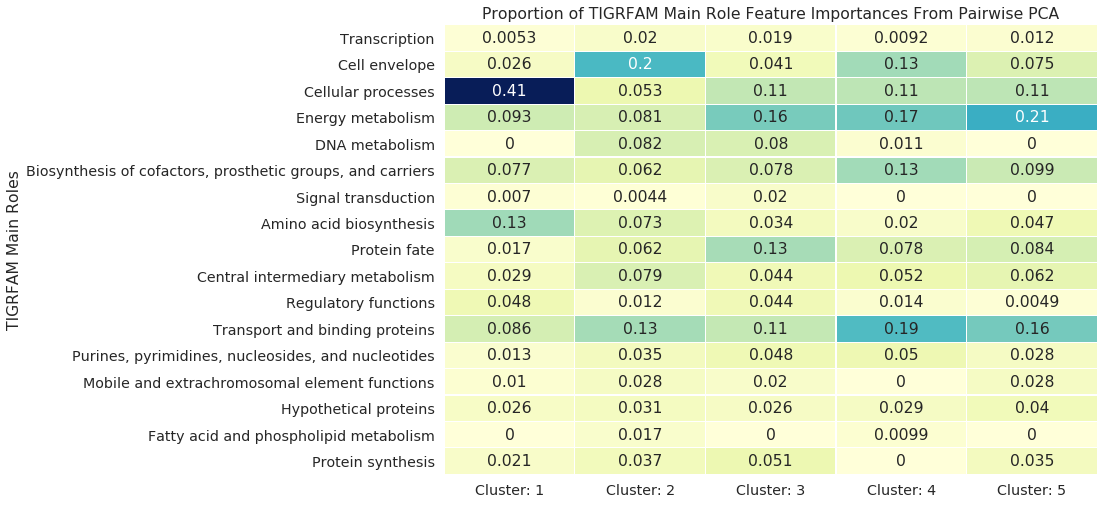

In [99]:
sns.heatmap(MainRoleDF.T, cmap="YlGnBu", annot=True, xticklabels=1, yticklabels=1,cbar=False,  linewidths=.1)

plt.ylabel("TIGRFAM Main Roles")
plt.xlabel("")
plt.title("Proportion of TIGRFAM Main Role Feature Importances From Pairwise PCA")
sns.set(font_scale=1.3)

## View Sub Role Heatmap

In [100]:
Cluster1_subrole['Cluster'] = 'Cluster: 1'
Cluster2_subrole['Cluster'] = 'Cluster: 2'
Cluster3_subrole['Cluster'] = 'Cluster: 3'
Cluster4_subrole['Cluster'] = 'Cluster: 4'
Cluster5_subrole['Cluster'] = 'Cluster: 5'

SubRoleList = [list(set(list(Cluster1_subrole['SubRole'])+list(Cluster2_subrole['SubRole'])+list(Cluster3_subrole['SubRole'])+list(Cluster4_subrole['SubRole'])+list(Cluster5_subrole['SubRole'])))]
SubRoleDF = pd.DataFrame(index=['Cluster: 1','Cluster: 2','Cluster: 3','Cluster: 4','Cluster: 5'], columns=SubRoleList)
SubRoleDF.fillna(0, inplace=True)

for row in Cluster1_subrole.index:
    SubRoleDF.at['Cluster: 1', Cluster1_subrole.at[row,'SubRole']] = Cluster1_subrole.at[row,'Count']
    
for row in Cluster2_subrole.index:
    SubRoleDF.at['Cluster: 2', Cluster2_subrole.at[row,'SubRole']] = Cluster2_subrole.at[row,'Count']
    
for row in Cluster3_subrole.index:
    SubRoleDF.at['Cluster: 3', Cluster3_subrole.at[row,'SubRole']] = Cluster3_subrole.at[row,'Count']
    
for row in Cluster4_subrole.index:
    SubRoleDF.at['Cluster: 4', Cluster4_subrole.at[row,'SubRole']] = Cluster4_subrole.at[row,'Count']
    
for row in Cluster5_subrole.index:
    SubRoleDF.at['Cluster: 5', Cluster5_subrole.at[row,'SubRole']] = Cluster5_subrole.at[row,'Count']
    

#SubRoleDF2 = SubRoleDF.div(SubRoleDF.sum(axis=1), axis=0).copy()
SubRoleDF

,Polyamine biosynthesis,Sugars,Biosynthesis and degradation of murein sacculus and peptidoglycan,Prophage functions,Chromosome-associated proteins,RNA interactions,Sulfur metabolism,Aromatic amino acid family,Nucleotide and nucleoside interconversions,Adaptations to atypical conditions,...,"Amino acids, peptides and amines",Pyridine nucleotides,Biotin,Transcription factors,Fermentation,DNA-dependent RNA polymerase,"Carbohydrates, organic alcohols, and acids","Heme, porphyrin, and cobalamin",Phosphorus compounds,Unknown substrate
Cluster: 1,0.017067,0.011375,0.005684,0.000000,0.000000,0.005595,0.000000,0.024880,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005368,0.000000,0.000000,0.036784,0.059569,0.012967,0.000000
Cluster: 2,0.032944,0.034218,0.025215,0.020248,0.000000,0.000000,0.002313,0.016472,0.016472,0.016472,...,0.021439,0.000000,0.019388,0.001455,0.008236,0.000000,0.010152,0.000000,0.051990,0.009003
Cluster: 3,0.007723,0.008536,0.032921,0.020868,0.000000,0.000000,0.000000,0.008143,0.019009,0.000000,...,0.018766,0.000000,0.000000,0.000000,0.030992,0.010267,0.061390,0.011526,0.000000,0.005883
Cluster: 4,0.009667,0.009596,0.039359,0.000000,0.011821,0.000000,0.039538,0.000000,0.000000,0.019614,...,0.004850,0.019825,0.018121,0.000000,0.000000,0.000000,0.040861,0.017690,0.000000,0.005517
Cluster: 5,0.009082,0.009195,0.014877,0.028803,0.000000,0.000000,0.035357,0.009251,0.000000,0.009645,...,0.015257,0.000000,0.000000,0.011902,0.031515,0.000000,0.009909,0.042518,0.009479,0.005263


In [101]:
SubRoleDF.loc['Cluster: 1'].sort_values(ascending=False).head(5)

Sporulation and germination       0.205582
Chemotaxis and motility           0.172592
Histidine family                  0.064514
Heme, porphyrin, and cobalamin    0.059569
Anions                            0.042445
Name: Cluster: 1, dtype: float64

In [102]:
SubRoleDF.loc['Cluster: 2'].sort_values(ascending=False).head(5)

Biosynthesis and degradation of surface polysaccharides and lipopolysaccharides    0.211304
DNA replication, recombination, and repair                                         0.099856
Phosphorus compounds                                                               0.051990
Glutamate family                                                                   0.041179
tRNA and rRNA base modification                                                    0.034735
Name: Cluster: 2, dtype: float64

In [103]:
SubRoleDF.loc['Cluster: 3'].sort_values(ascending=False).head(5)

DNA replication, recombination, and repair         0.083736
Protein and peptide secretion and trafficking      0.069569
Carbohydrates, organic alcohols, and acids         0.061390
Biosynthesis and degradation of polysaccharides    0.059553
DNA interactions                                   0.046327
Name: Cluster: 3, dtype: float64

In [104]:
SubRoleDF.loc['Cluster: 4'].sort_values(ascending=False).head(5)

Cations and iron carrying compounds                                                0.098640
Biosynthesis and degradation of surface polysaccharides and lipopolysaccharides    0.072624
Electron transport                                                                 0.069565
DNA transformation                                                                 0.055308
TCA cycle                                                                          0.052645
Name: Cluster: 4, dtype: float64

In [105]:
SubRoleDF.loc['Cluster: 5'].sort_values(ascending=False).head(5)

Cations and iron carrying compounds                                                0.091456
Amino acids and amines                                                             0.068823
Electron transport                                                                 0.064949
Biosynthesis and degradation of surface polysaccharides and lipopolysaccharides    0.056216
DNA transformation                                                                 0.050299
Name: Cluster: 5, dtype: float64

Text(0.5,1,'Proportion of TIGRFAM Sub Role Feature Importances From Pairwise PCA')

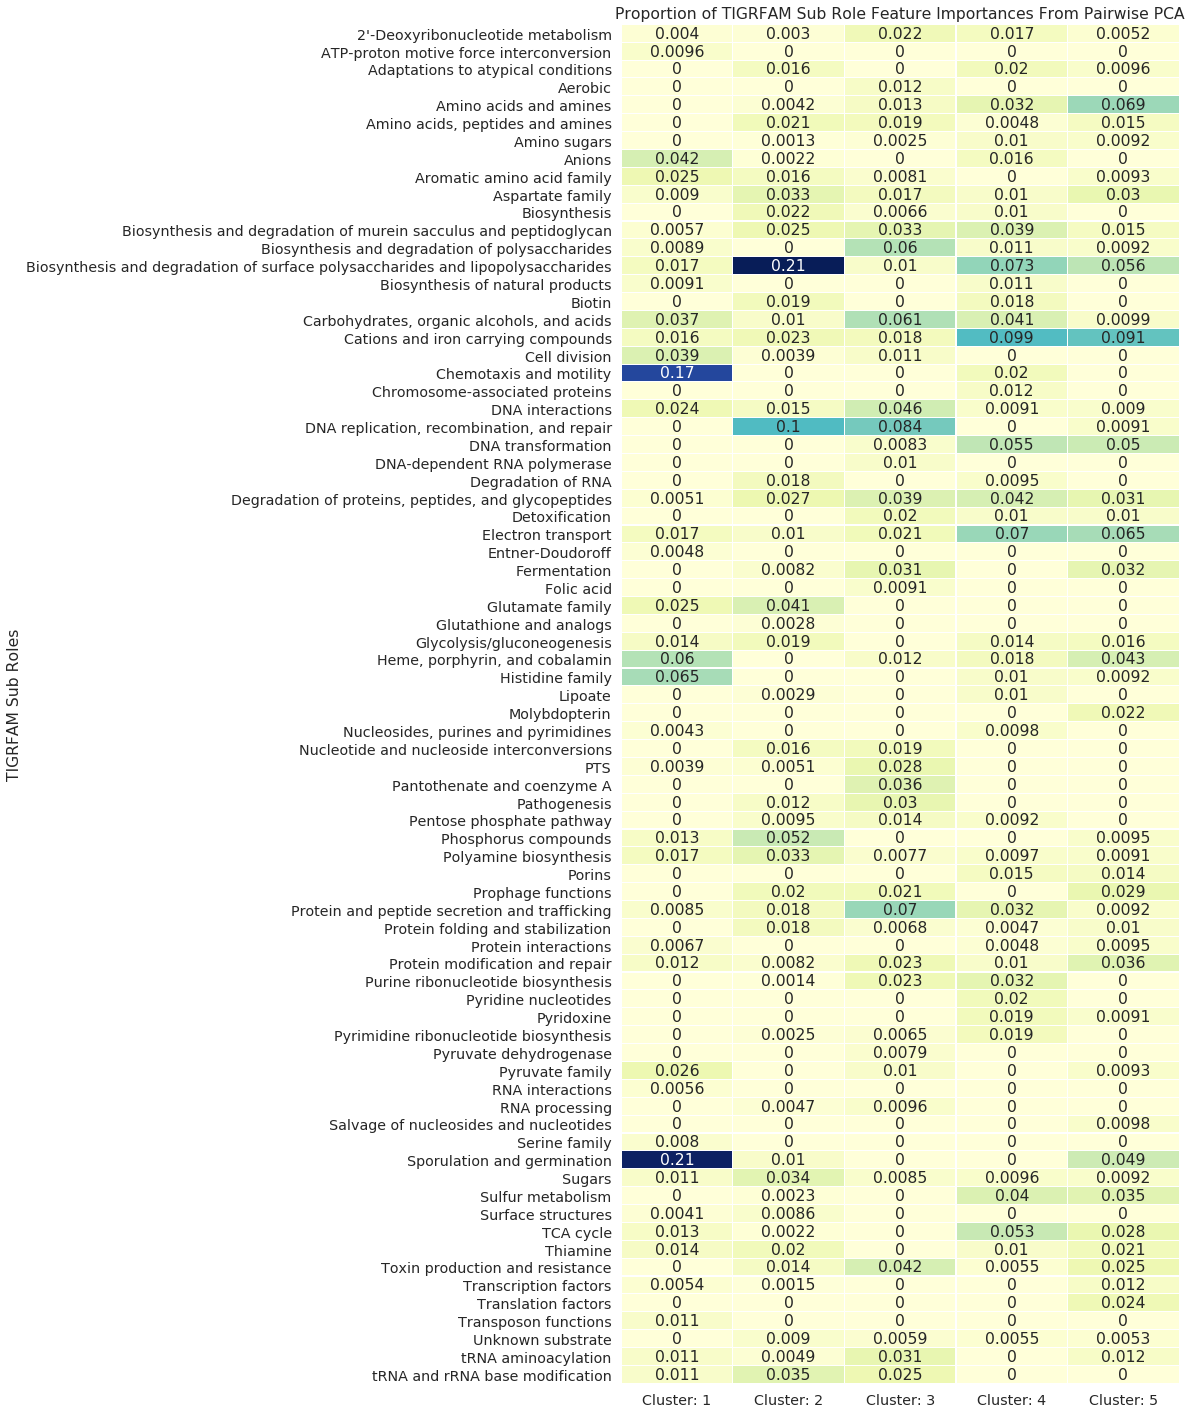

In [106]:
plt.subplots(figsize=(10,25))
sns.heatmap(SubRoleDF[sorted(list(SubRoleDF.columns))].T, cmap="YlGnBu", annot=True, xticklabels=1, cbar=False, yticklabels=1, linewidths=.1)
plt.ylabel("TIGRFAM Sub Roles")
plt.title("Proportion of TIGRFAM Sub Role Feature Importances From Pairwise PCA")

## Look at cluster Taxonomy

In [107]:
moduelClusterDF = pd.read_csv("./Files//Networks/Modules/ModuleCluster_df.csv").set_index("Module")
moduleCluster_dict = {}
for row in moduelClusterDF.index:
    for column in moduelClusterDF.columns:
        if moduelClusterDF.at[row,column] == 1.0:
            moduleCluster_dict[row] = column
        else:
            continue
            
import dill
import pickle

with open('./Files/Networks/Modules/Healthy_modules.pkl', 'rb') as handle:
    healthyModuleLabel = pickle.load(handle)
    
    
with open('./Files/Networks/Modules/CRC_modules.pkl', 'rb') as handle:
    crcModuleLabel = pickle.load(handle)
    
crcNodeClusterColor = {}
for module in crcModuleLabel.keys():
    for species in crcModuleLabel[module]:
        crcNodeClusterColor[species]=moduleCluster_dict[module]
        
healthyNodeClusterColor = {}
for module in healthyModuleLabel.keys():
    for species in healthyModuleLabel[module]:
        healthyNodeClusterColor[species]=moduleCluster_dict[module]

In [108]:
clusterTaxDF = pd.DataFrame(index=['Cluster_1','Cluster_2','Cluster_3','Cluster_4','Cluster_5'], columns=list(set(list(crcNodeClusterColor.keys())+list(healthyNodeClusterColor.keys())))).fillna(0)
clusterTaxDF_crc = clusterTaxDF.copy()
clusterTaxDF_healthy = clusterTaxDF.copy()

for species in list(crcNodeClusterColor.keys()):
    clusterTaxDF_crc.at[crcNodeClusterColor[species],species] = 1
    
for species in list(healthyNodeClusterColor.keys()):
    clusterTaxDF_healthy.at[healthyNodeClusterColor[species],species] = 1

In [109]:
for cluster in clusterTaxDF_healthy.index:
    clusterTaxDF_healthy.rename(index={cluster:str(cluster)+"_Healthy"}, inplace=True)

In [110]:
for cluster in clusterTaxDF_crc.index:
    clusterTaxDF_crc.rename(index={cluster:str(cluster)+"_CRC"}, inplace=True)

In [111]:
clusterBoth = pd.concat([clusterTaxDF_healthy,clusterTaxDF_crc])
#clusterBoth.reset_index().sort_values(by=index, axis=0)
#sns.heatmap(clusterTaxDF_crc.T)
clusterBoth

,Alistipes_putredinis,Streptococcus_sp_A12,Bacteroides_thetaiotaomicron,Bacteroides_uniformis,Clostridium_phoceensis,Bariatricus_massiliensis,Monoglobus_pectinilyticus,Coprococcus_comes,Sellimonas_intestinalis,Parvimonas_micra,...,Gemmiger_formicilis,Holdemania_massiliensis,Streptococcus_mitis,Oscillibacter_sp_PEA192,Culturomica_massiliensis,Bacteroides_caecimuris,Bacteroides_salyersiae,Eubacterium_rectale,Blautia_hansenii,Ruminococcus_faecis
Cluster_1_Healthy,0,0,0,0,1,0,1,0,1,0,...,1,1,0,1,0,0,0,1,0,1
Cluster_2_Healthy,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Cluster_3_Healthy,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Cluster_4_Healthy,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
Cluster_5_Healthy,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
Cluster_1_CRC,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Cluster_2_CRC,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Cluster_3_CRC,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Cluster_4_CRC,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Cluster_5_CRC,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,0


In [112]:
clusterBoth2 = clusterBoth.copy()
for row in clusterBoth2.index:
    clusterBoth2.rename(index={row:row.split("_")[0]+": "+row.split("_")[1]+" ("+row.split("_")[2]+")"}, inplace=True)
clusterBoth2

,Alistipes_putredinis,Streptococcus_sp_A12,Bacteroides_thetaiotaomicron,Bacteroides_uniformis,Clostridium_phoceensis,Bariatricus_massiliensis,Monoglobus_pectinilyticus,Coprococcus_comes,Sellimonas_intestinalis,Parvimonas_micra,...,Gemmiger_formicilis,Holdemania_massiliensis,Streptococcus_mitis,Oscillibacter_sp_PEA192,Culturomica_massiliensis,Bacteroides_caecimuris,Bacteroides_salyersiae,Eubacterium_rectale,Blautia_hansenii,Ruminococcus_faecis
Cluster: 1 (Healthy),0,0,0,0,1,0,1,0,1,0,...,1,1,0,1,0,0,0,1,0,1
Cluster: 2 (Healthy),0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Cluster: 3 (Healthy),0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Cluster: 4 (Healthy),1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
Cluster: 5 (Healthy),0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
Cluster: 1 (CRC),0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Cluster: 2 (CRC),0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Cluster: 3 (CRC),0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Cluster: 4 (CRC),0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Cluster: 5 (CRC),0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,0


Text(0.5,1,'Species Presence Within Group Functional Module Clusters')

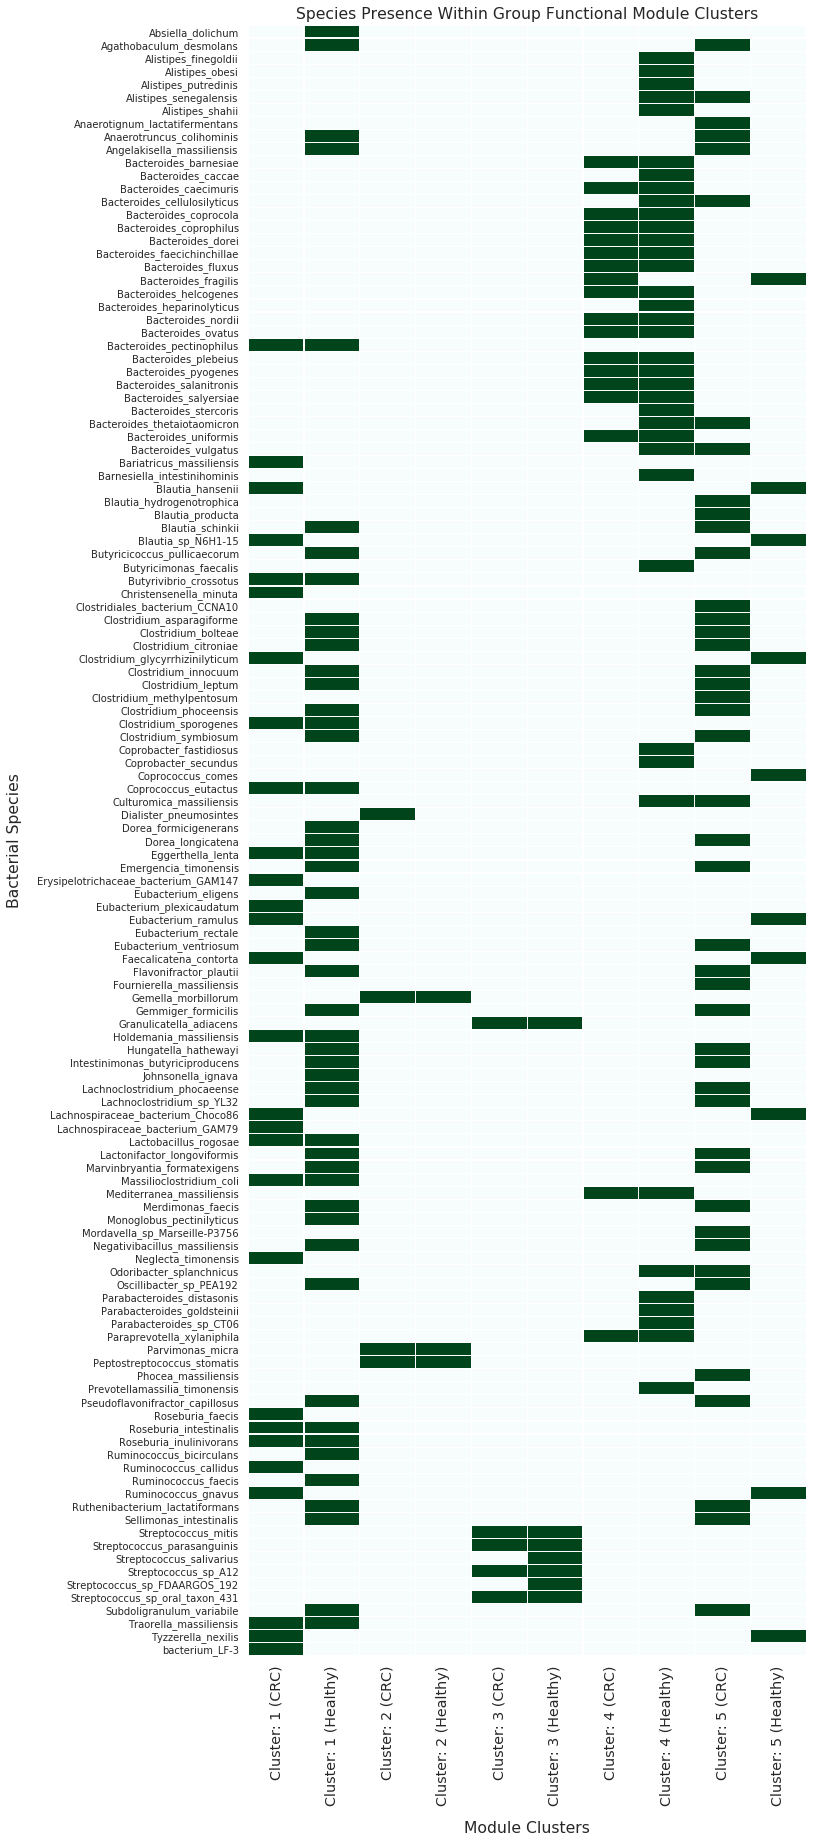

In [113]:
plt.subplots(figsize=(10,30))
plt.yticks(size=10)
sns.heatmap(clusterBoth2.reset_index().sort_values(by=['index']).set_index("index").T.loc[sorted(list(clusterBoth2.reset_index().sort_values(by=['index']).set_index("index").T.index))], cmap="BuGn", annot=False, xticklabels=1, yticklabels=1, cbar=False, linewidths=.1)
plt.xlabel('Module Clusters', labelpad=15)
plt.ylabel('Bacterial Species', labelpad=15)
plt.title("Species Presence Within Group Functional Module Clusters")

In [114]:
clusterBoth2.index

Index(['Cluster: 1 (Healthy)', 'Cluster: 2 (Healthy)', 'Cluster: 3 (Healthy)',
       'Cluster: 4 (Healthy)', 'Cluster: 5 (Healthy)', 'Cluster: 1 (CRC)',
       'Cluster: 2 (CRC)', 'Cluster: 3 (CRC)', 'Cluster: 4 (CRC)',
       'Cluster: 5 (CRC)'],
      dtype='object')

In [115]:
hammingDF = pd.DataFrame(index=list(clusterBoth2.index), columns=list(clusterBoth2.index))
hammingDF.fillna(0.0, inplace=True)

from scipy.spatial import distance

for x in clusterBoth2.index:
    for y in clusterBoth2.index:
        hammingDF.at[x,y]=(distance.jaccard(clusterBoth2.loc[x],clusterBoth2.loc[y]))
hammingDF

,Cluster: 1 (Healthy),Cluster: 2 (Healthy),Cluster: 3 (Healthy),Cluster: 4 (Healthy),Cluster: 5 (Healthy),Cluster: 1 (CRC),Cluster: 2 (CRC),Cluster: 3 (CRC),Cluster: 4 (CRC),Cluster: 5 (CRC)
Cluster: 1 (Healthy),0.000000,1.00,1.000000,1.000000,1.000000,0.833333,1.00,1.000000,1.000000,0.523810
Cluster: 2 (Healthy),1.000000,0.00,1.000000,1.000000,1.000000,1.000000,0.25,1.000000,1.000000,1.000000
Cluster: 3 (Healthy),1.000000,1.00,0.000000,1.000000,1.000000,1.000000,1.00,0.285714,1.000000,1.000000
Cluster: 4 (Healthy),1.000000,1.00,1.000000,0.000000,1.000000,1.000000,1.00,1.000000,0.564103,0.921053
Cluster: 5 (Healthy),1.000000,1.00,1.000000,1.000000,0.000000,0.733333,1.00,1.000000,0.962963,1.000000
Cluster: 1 (CRC),0.833333,1.00,1.000000,1.000000,0.733333,0.000000,1.00,1.000000,1.000000,1.000000
Cluster: 2 (CRC),1.000000,0.25,1.000000,1.000000,1.000000,1.000000,0.00,1.000000,1.000000,1.000000
Cluster: 3 (CRC),1.000000,1.00,0.285714,1.000000,1.000000,1.000000,1.00,0.000000,1.000000,1.000000
Cluster: 4 (CRC),1.000000,1.00,1.000000,0.564103,0.962963,1.000000,1.00,1.000000,0.000000,1.000000
Cluster: 5 (CRC),0.523810,1.00,1.000000,0.921053,1.000000,1.000000,1.00,1.000000,1.000000,0.000000


Text(0.5,1,'Jaccard-Needham dissimilarity of species presence/absence within clusters')

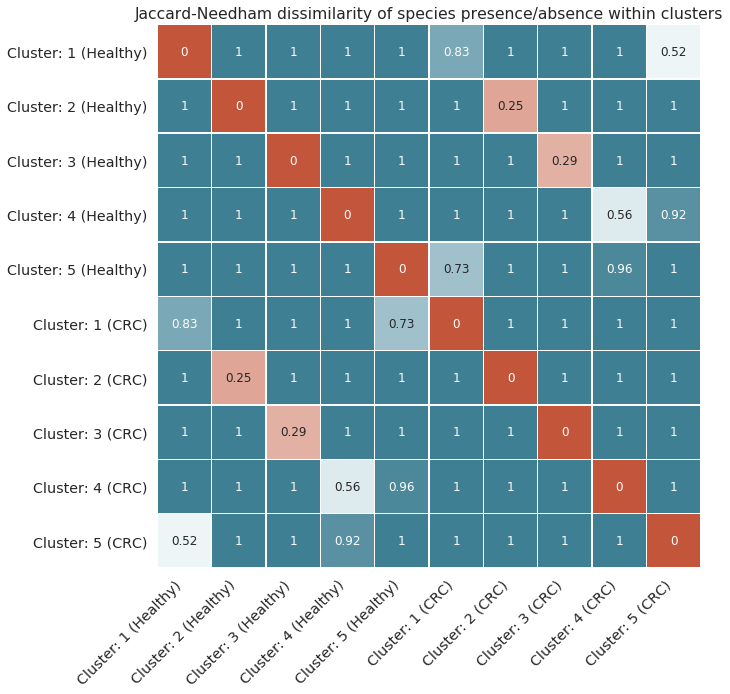

In [116]:
plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    hammingDF, 
    vmin=0, vmax=1,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, linewidths=.5, cbar=False, annot_kws={"fontsize":12}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title("Jaccard-Needham dissimilarity of species presence/absence within clusters")

Text(0.5,1,'Spearman correlation of species presence/absence within clusters')

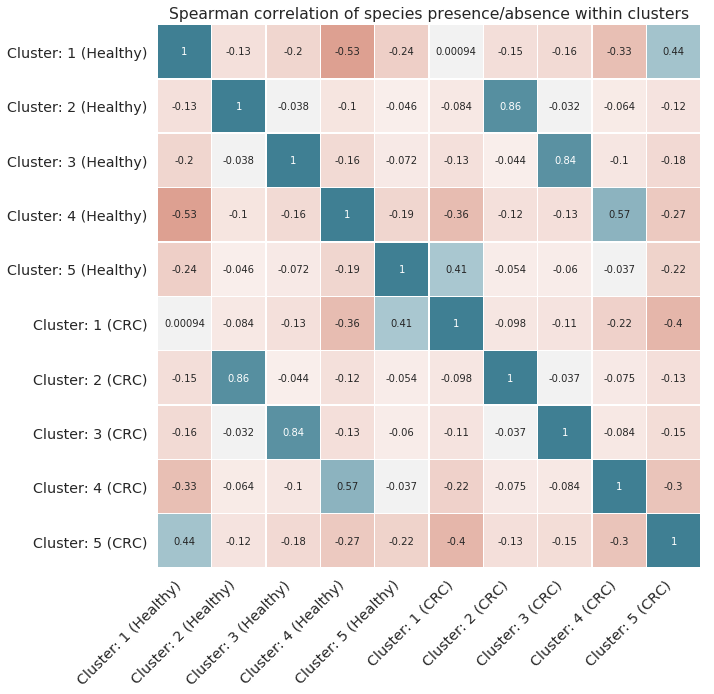

In [117]:
plt.subplots(figsize=(10,10))
corr = clusterBoth2.T.corr(method='spearman')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, linewidths=.5, cbar=False, annot_kws={"fontsize":10}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title("Spearman correlation of species presence/absence within clusters")

In [118]:
accTaxDictDF = pd.read_csv("./Files/Dataframes/Master_Rename.csv").set_index("Bacterial_Strain")
accTaxDictDF['Species'] = accTaxDictDF['Species'].astype(str)
accTaxDictDF.head()

accTaxDictDF2 = accTaxDictDF.reset_index().set_index("Species").copy()

accTaxDictDF3 = accTaxDictDF2.loc[~accTaxDictDF2.index.duplicated(keep='first')].copy()

In [119]:
clusterBoth_genera = clusterBoth.copy()
for column in clusterBoth.columns:
    clusterBoth_genera.rename(columns={column:accTaxDictDF3.at[column.replace(".","-"), 'Genus']}, inplace=True)
clusterBoth_genera2 = clusterBoth_genera.groupby(by=clusterBoth_genera.columns, axis=1).sum().copy()
clusterBoth_genera3 = clusterBoth_genera2.div(clusterBoth_genera2.sum(axis=1), axis=0).copy()  

In [120]:
clusterBoth_genera3
for row in clusterBoth_genera3.index:
    clusterBoth_genera3.rename(index={row:row.split("_")[0]+": "+row.split("_")[1]+" ("+row.split("_")[2]+")"}, inplace=True)
clusterBoth_genera3

,Absiella,Agathobaculum,Alistipes,Anaerotignum,Anaerotruncus,Angelakisella,Bacteroides,Bariatricus,Barnesiella,Blautia,...,Streptococcus,Subdoligranulum,Traorella,Tyzzerella,Unclassified_Bacillales,Unclassified_Bacteria,Unclassified_Clostridiales,Unclassified_Erysipelotrichaceae,Unclassified_Lachnospiraceae,Unclassified_Ruminococcaceae
Cluster: 1 (Healthy),0.020408,0.020408,0.000000,0.000000,0.020408,0.020408,0.000000,0.000000,0.000000,0.020408,...,0.000000,0.020408,0.020408,0.000000,0.000000,0.000000,0.061224,0.000000,0.020408,0.020408
Cluster: 2 (Healthy),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
Cluster: 3 (Healthy),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.857143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cluster: 4 (Healthy),0.000000,0.000000,0.131579,0.000000,0.000000,0.000000,0.552632,0.000000,0.026316,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cluster: 5 (Healthy),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.300000,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
Cluster: 1 (CRC),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.107143,...,0.000000,0.000000,0.035714,0.035714,0.000000,0.035714,0.035714,0.035714,0.071429,0.000000
Cluster: 2 (CRC),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
Cluster: 3 (CRC),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cluster: 4 (CRC),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888889,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cluster: 5 (CRC),0.000000,0.022727,0.022727,0.022727,0.022727,0.022727,0.068182,0.000000,0.000000,0.068182,...,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.045455


Text(0.5,62.3594,'Genera')

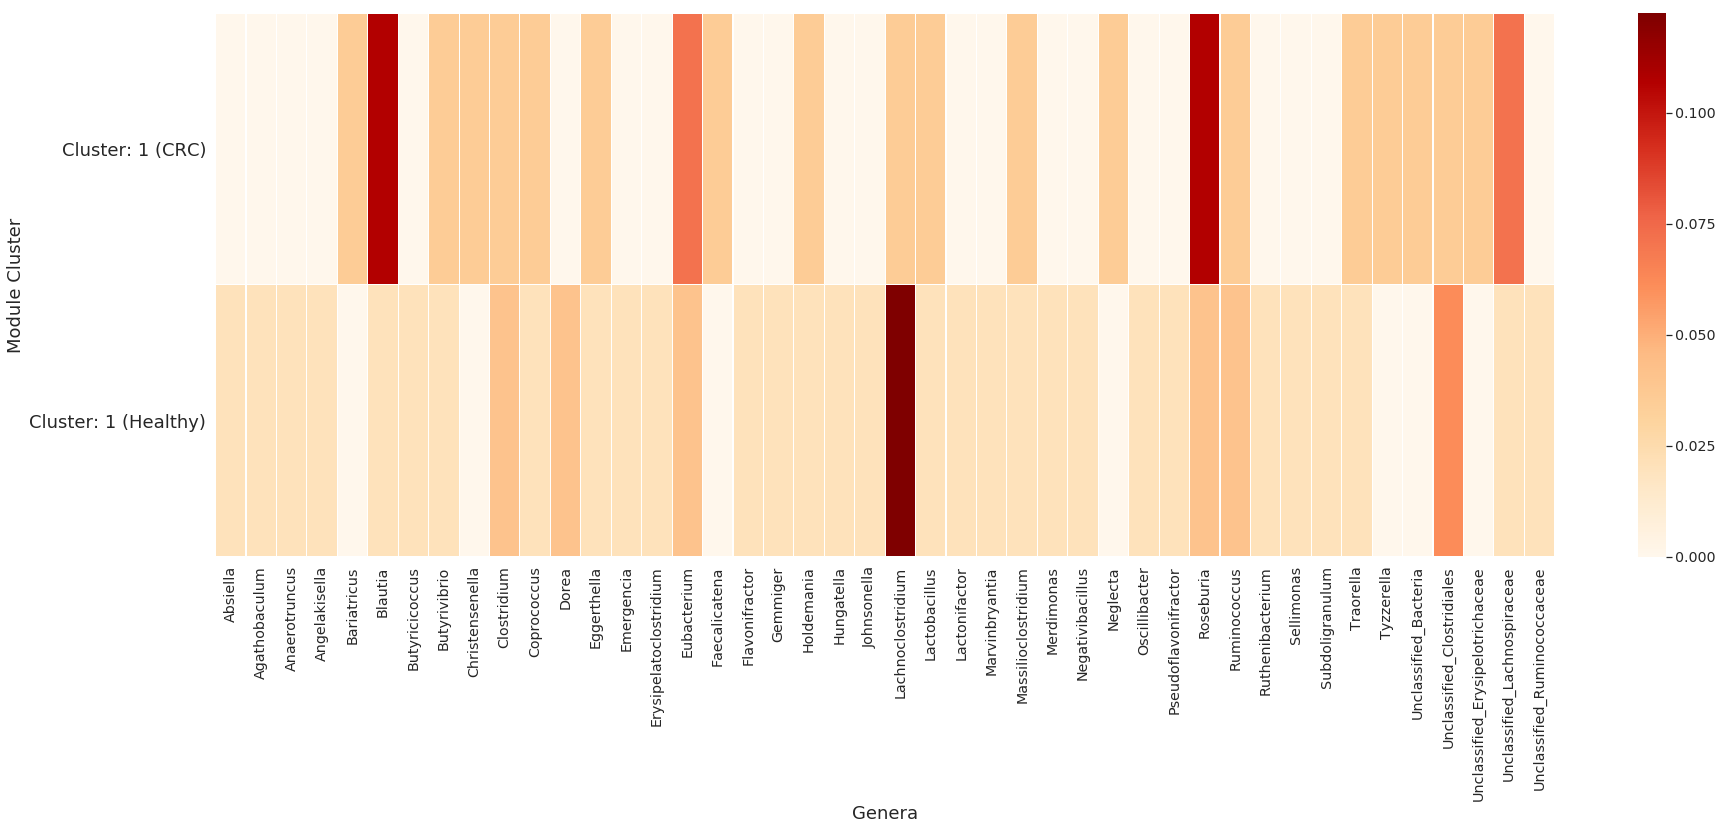

In [121]:
plt.subplots(figsize=(30,10))
sns.heatmap(clusterBoth_genera3.loc[['Cluster: 1 (Healthy)','Cluster: 1 (CRC)']].replace(0.0, np.nan).dropna(thresh=1, axis=1).fillna(0.0).reset_index().sort_values(by=['index']).set_index("index"), cmap="OrRd", annot=False, xticklabels=1, yticklabels=1, linewidths=.1)
plt.yticks(rotation='horizontal')
plt.yticks(size=18)
plt.ylabel("Module Cluster", size=18)
plt.xlabel("Genera", size=18)

Text(0.5,62.3594,'Genera')

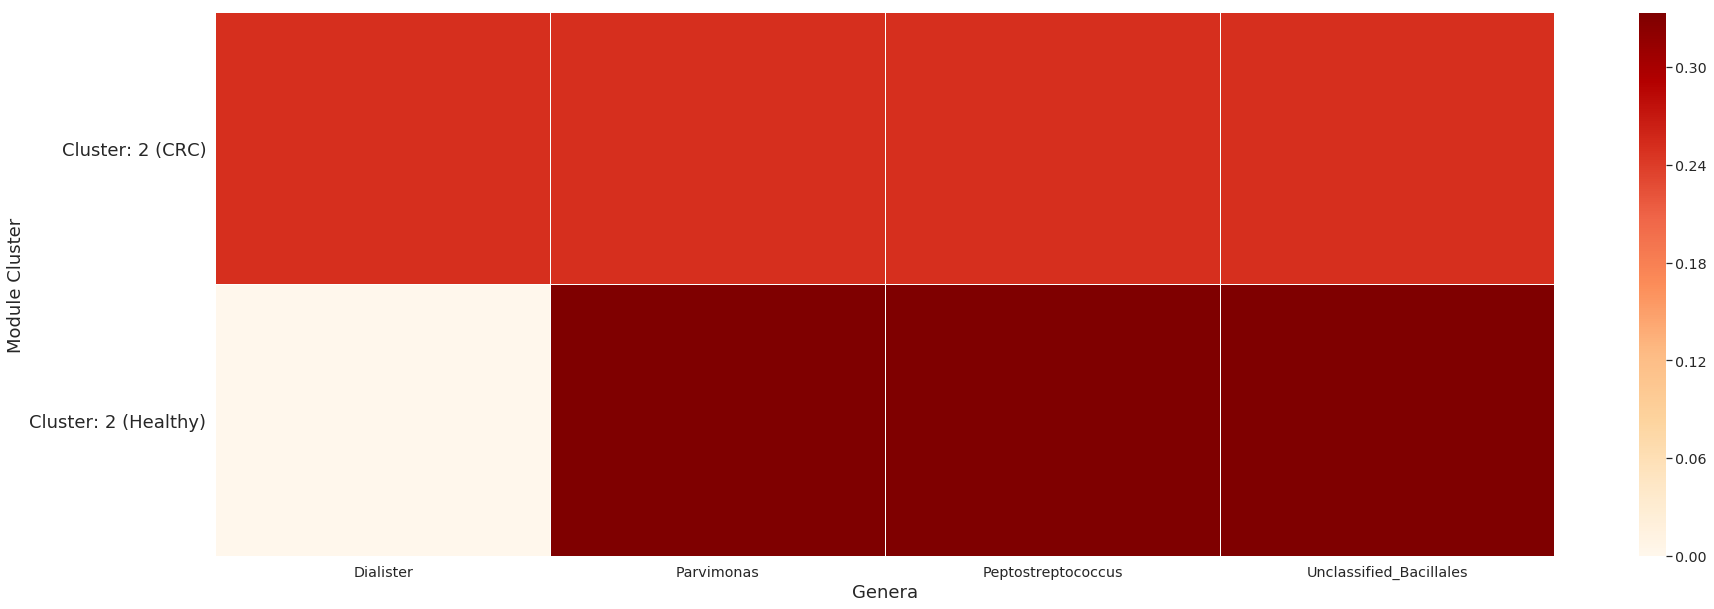

In [122]:
plt.subplots(figsize=(30,10))
sns.heatmap(clusterBoth_genera3.loc[['Cluster: 2 (Healthy)','Cluster: 2 (CRC)']].replace(0.0, np.nan).dropna(thresh=1, axis=1).fillna(0.0).reset_index().sort_values(by=['index']).set_index("index"), cmap="OrRd", annot=False, xticklabels=1, yticklabels=1, linewidths=.1)
plt.yticks(rotation='horizontal')
plt.yticks(size=18)
plt.ylabel("Module Cluster", size=18)
plt.xlabel("Genera", size=18)

Text(0.5,62.5,'Genera')

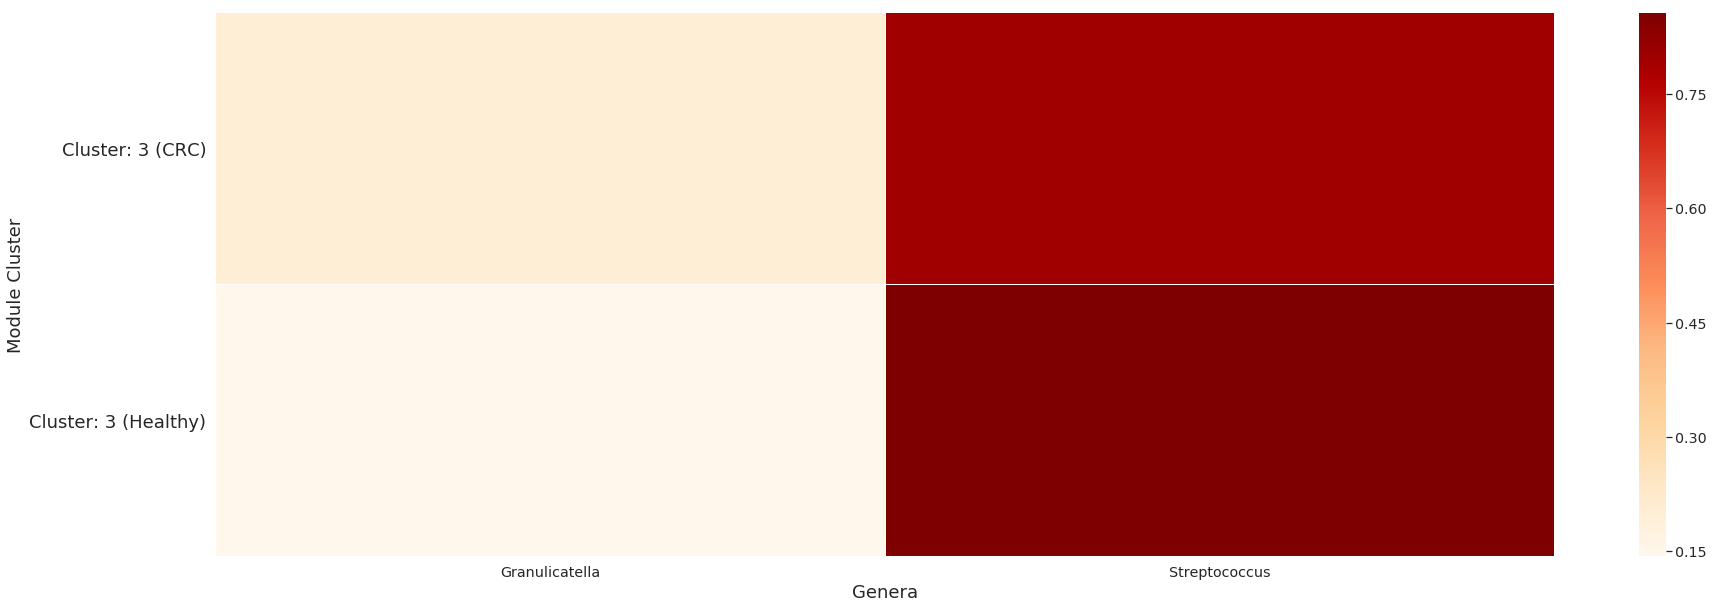

In [123]:
plt.subplots(figsize=(30,10))
sns.heatmap(clusterBoth_genera3.loc[['Cluster: 3 (Healthy)','Cluster: 3 (CRC)']].replace(0.0, np.nan).dropna(thresh=1, axis=1).fillna(0.0).reset_index().sort_values(by=['index']).set_index("index"), cmap="OrRd", annot=False, xticklabels=1, yticklabels=1, linewidths=.1)
plt.yticks(rotation='horizontal')
plt.yticks(size=18)
plt.ylabel("Module Cluster", size=18)
plt.xlabel("Genera", size=18)

Text(0.5,62.5,'Genera')

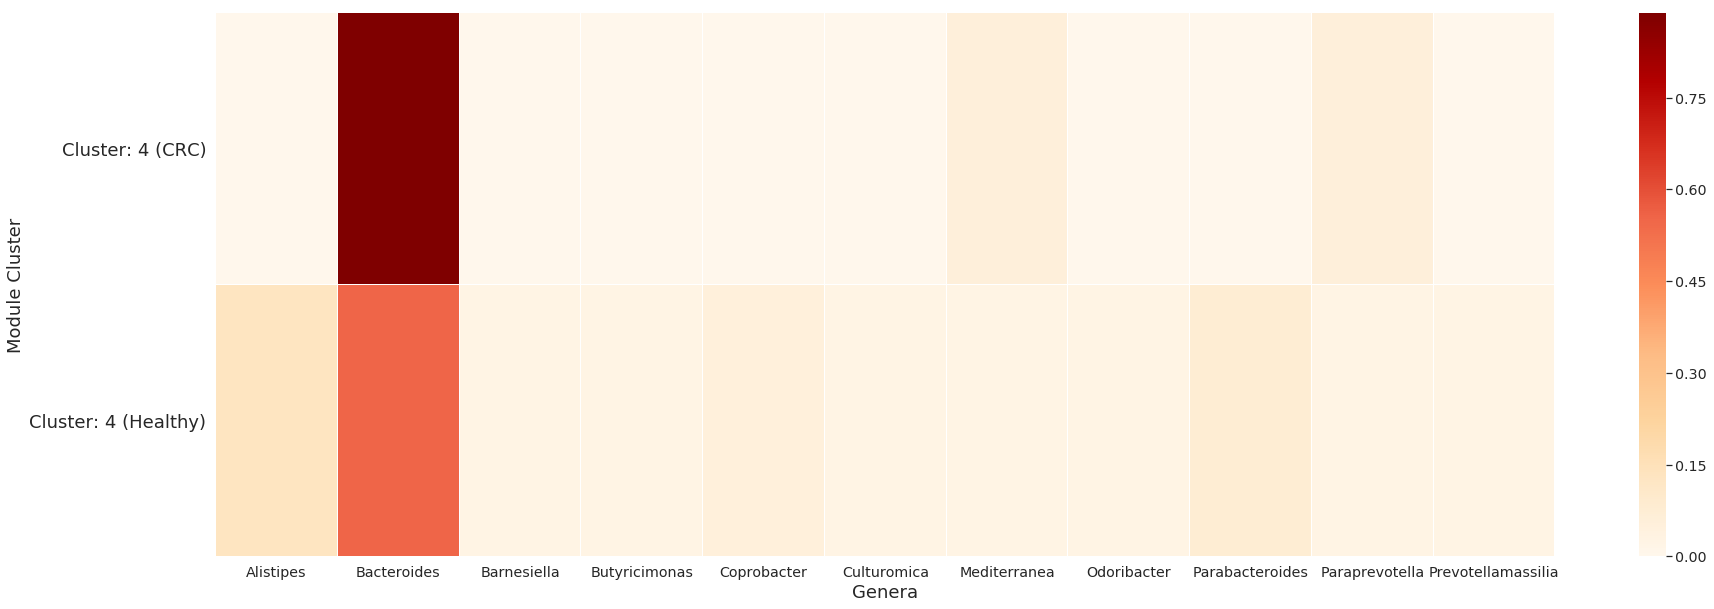

In [124]:
plt.subplots(figsize=(30,10))
sns.heatmap(clusterBoth_genera3.loc[['Cluster: 4 (Healthy)','Cluster: 4 (CRC)']].replace(0.0, np.nan).dropna(thresh=1, axis=1).fillna(0.0).reset_index().sort_values(by=['index']).set_index("index"), cmap="OrRd", annot=False, xticklabels=1, yticklabels=1, linewidths=.1)
plt.yticks(rotation='horizontal')
plt.yticks(size=18)
plt.ylabel("Module Cluster", size=18)
plt.xlabel("Genera", size=18)

Text(0.5,62.3594,'Genera')

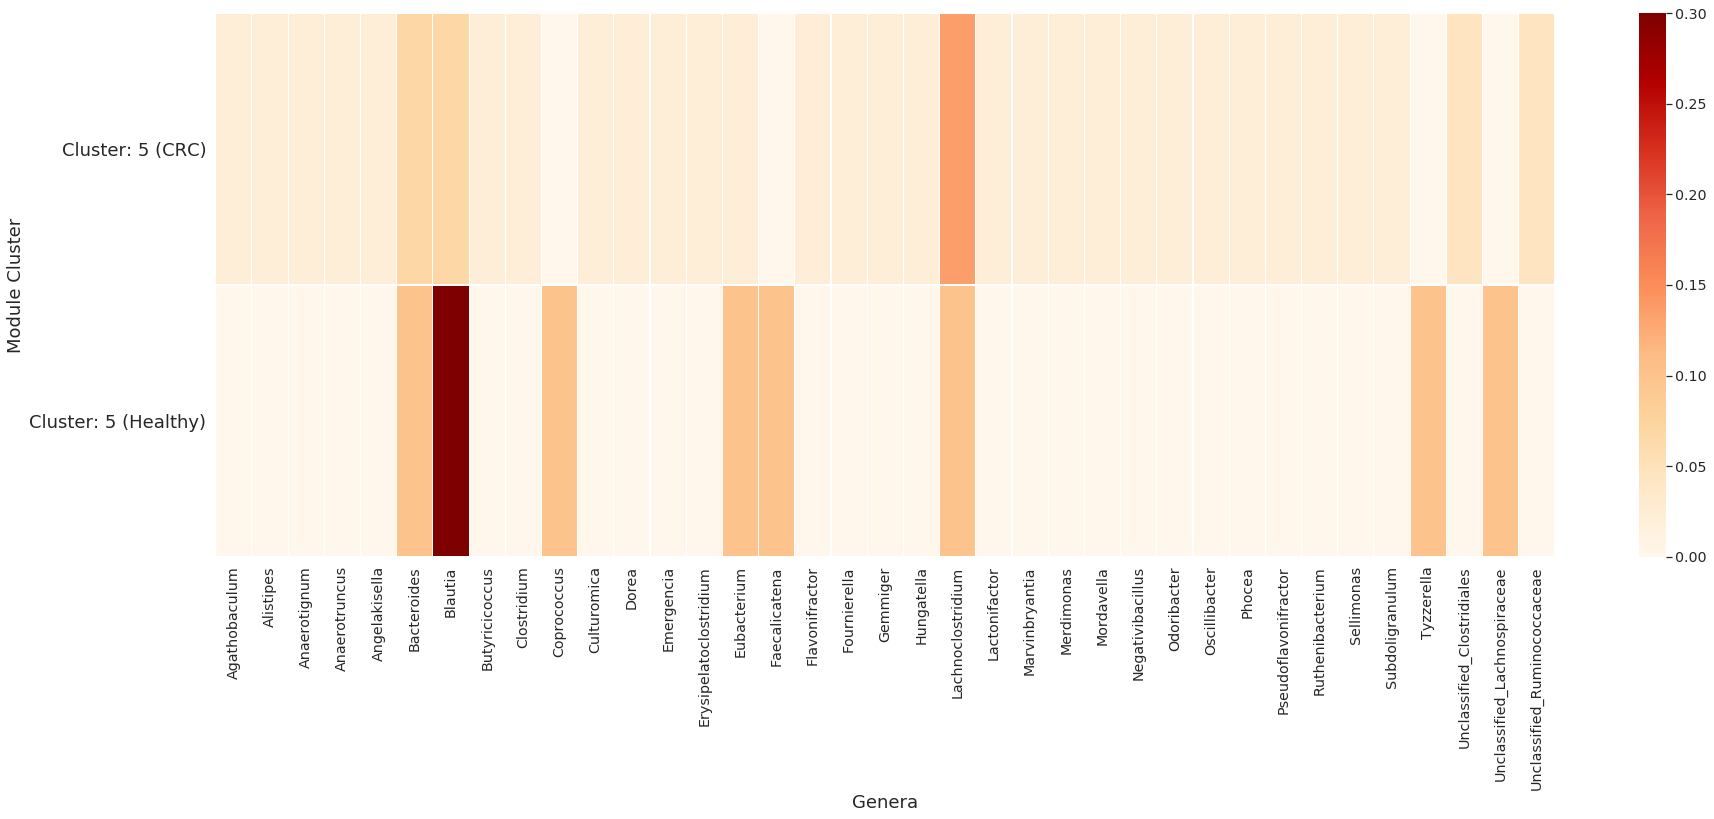

In [125]:
plt.subplots(figsize=(30,10))
plt.yticks(size=18)
sns.heatmap(clusterBoth_genera3.loc[['Cluster: 5 (Healthy)','Cluster: 5 (CRC)']].replace(0.0, np.nan).dropna(thresh=1, axis=1).fillna(0.0).reset_index().sort_values(by=['index']).set_index("index"), cmap="OrRd", annot=False, xticklabels=1, yticklabels=1, linewidths=.1)
plt.yticks(rotation='horizontal')
plt.ylabel("Module Cluster", size=18)
plt.xlabel("Genera", size=18)